In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# РЕГРЕССИЯ

Ссылка: https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction

Набор данных о цене ноутбуков.

Целевая переменная - Price.



In [12]:
data = pd.read_csv('Laptop_price.csv')
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


# Анализ данных

Размер датасета

In [5]:
data.shape

(1000, 7)

Статистическая информация

In [6]:
data.describe(include='all')

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN
freq,210,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,NaN,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,NaN,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,NaN,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,NaN,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,NaN,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754


Информация о наборе данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


Заменим категориальные признаки на числовые

In [8]:
data['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [13]:
data = pd.get_dummies(data, columns=['Brand'])
data

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017,False,False,False,True,False
996,2.780555,8,256,12.679356,3.750265,9149.521832,False,False,True,False,False
997,3.200569,4,512,12.666315,3.392612,16552.404779,False,False,True,False,False
998,1.604182,8,256,11.215581,3.857613,9407.473459,False,True,False,False,False


In [14]:
data.columns

Index(['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size',
       'Weight', 'Price', 'Brand_Acer', 'Brand_Asus', 'Brand_Dell', 'Brand_HP',
       'Brand_Lenovo'],
      dtype='object')

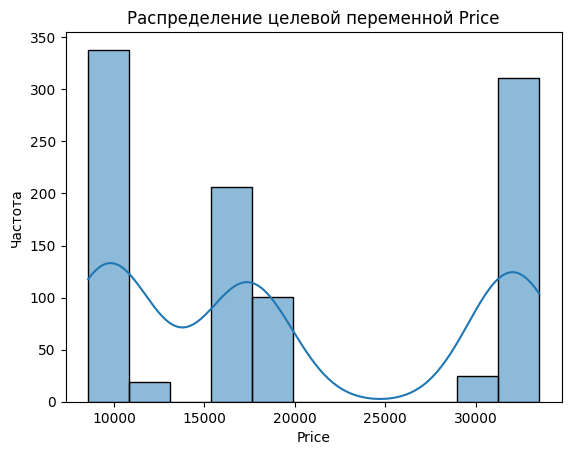

In [15]:
sns.histplot(data['Price'], kde=True)
plt.title('Распределение целевой переменной Price')
plt.xlabel('Price')
plt.ylabel('Частота')
plt.show()

Диаграммы рассеяния (зависимость целевой переменной от признаков)

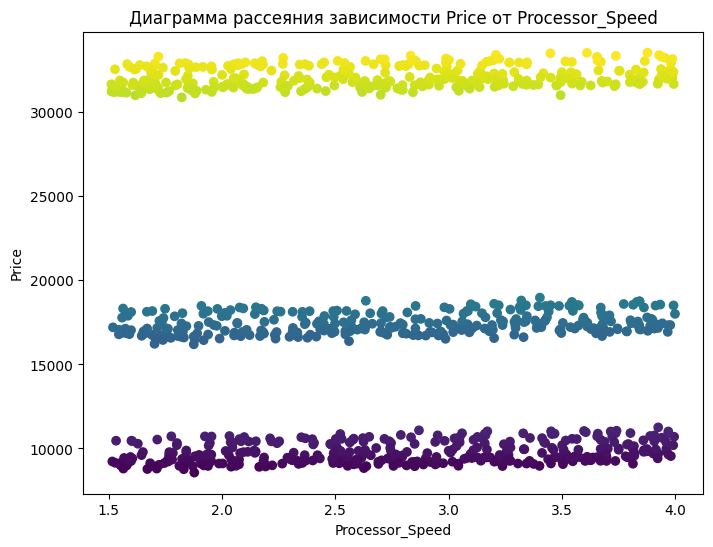

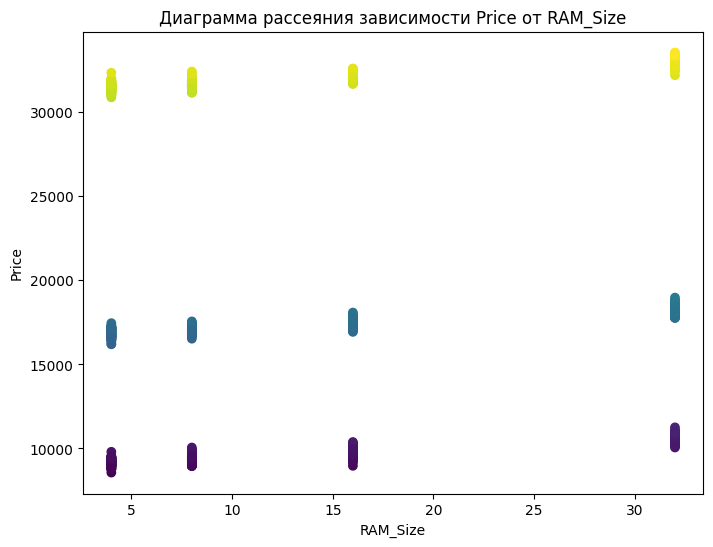

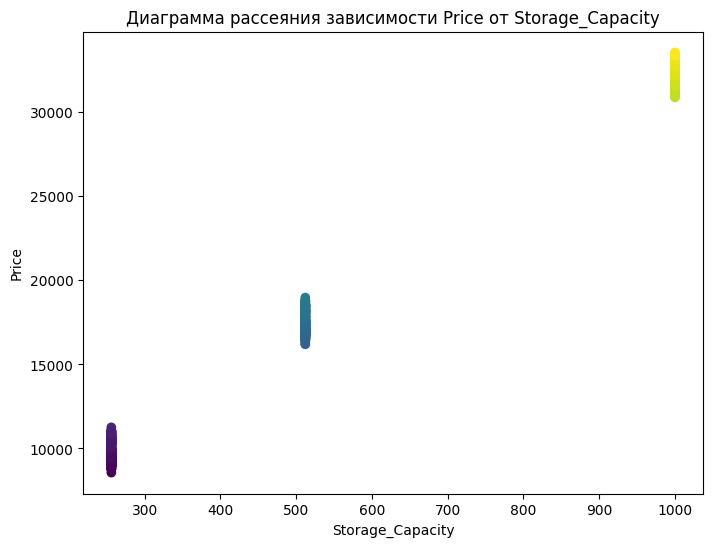

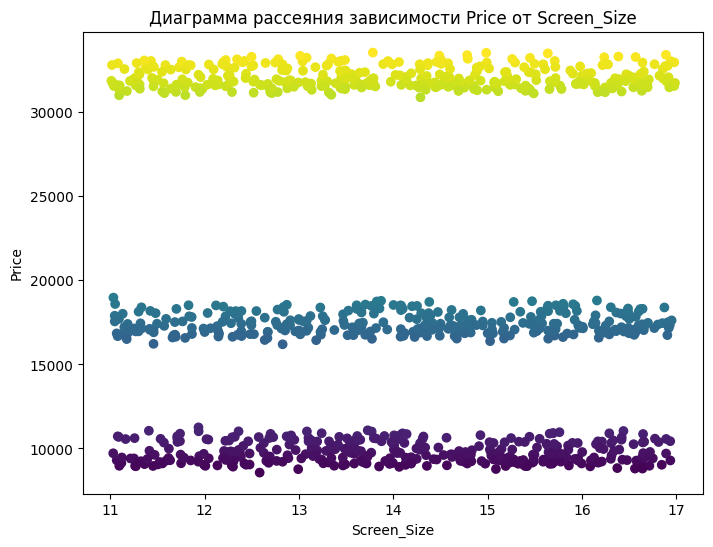

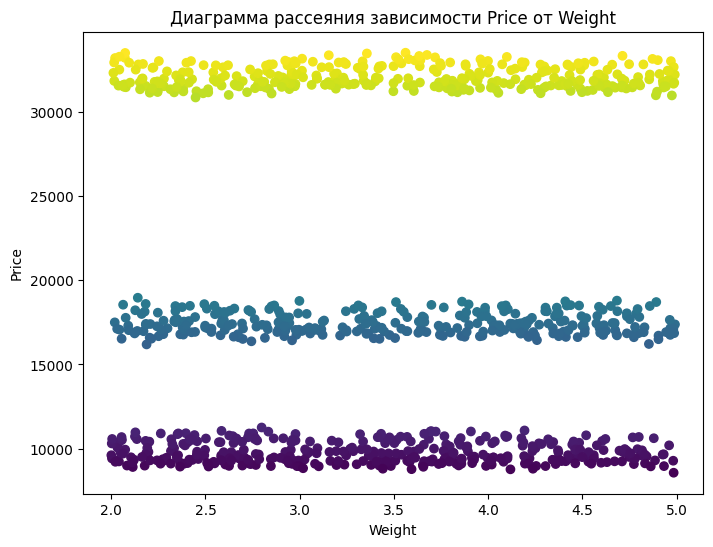

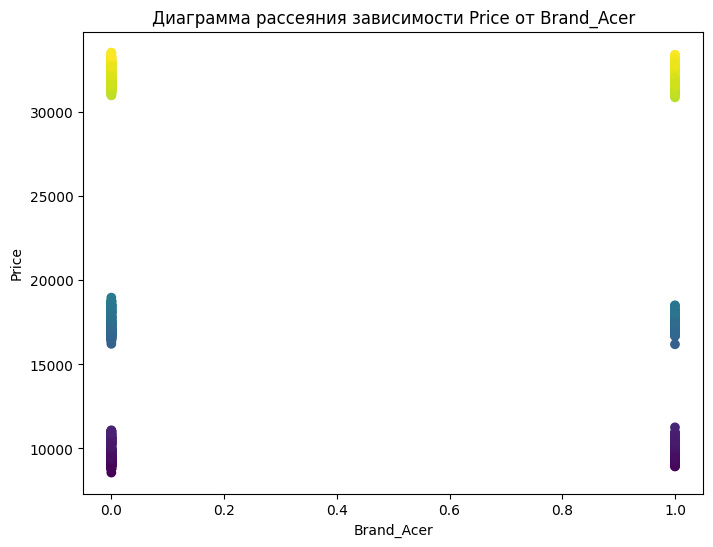

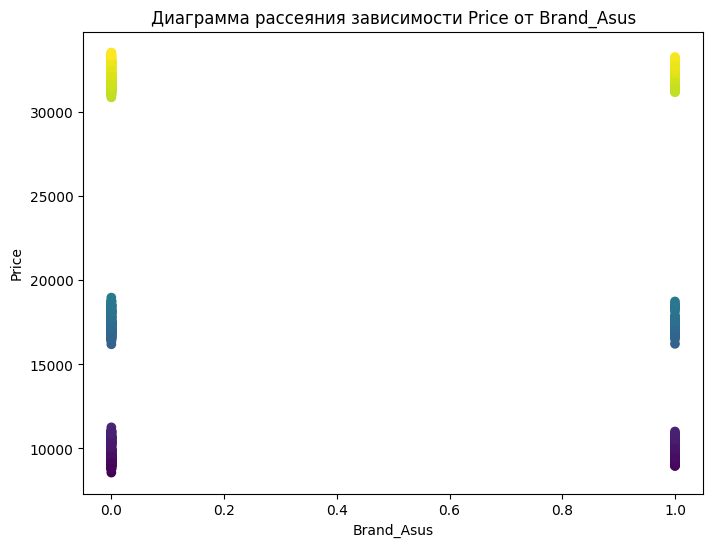

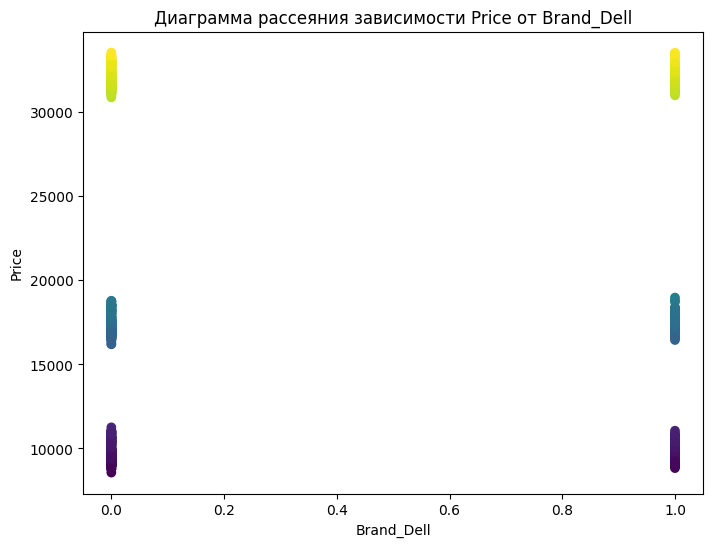

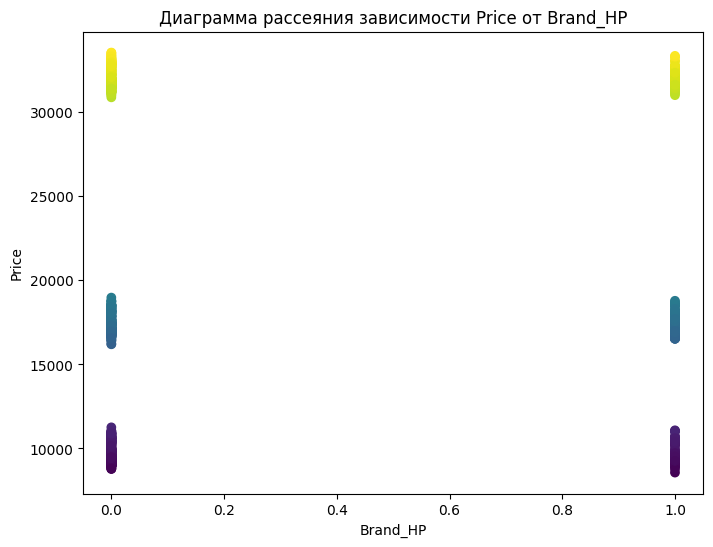

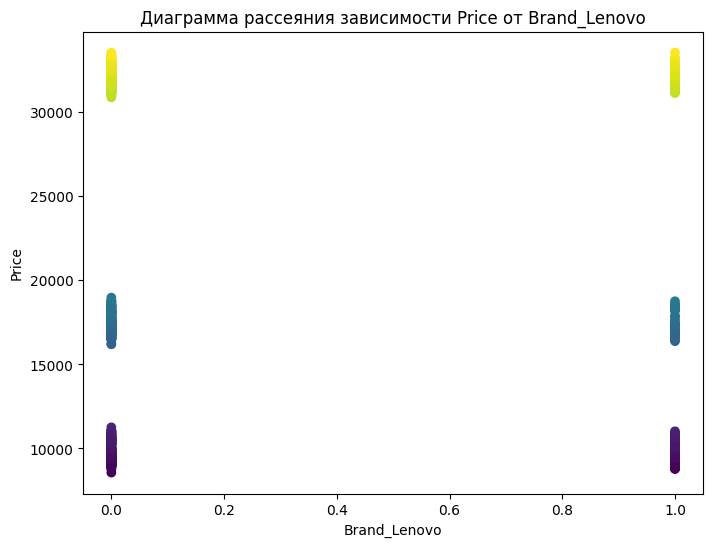

In [16]:
features = [
       'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size',
       'Weight', 'Brand_Acer', 'Brand_Asus', 'Brand_Dell', 'Brand_HP',
       'Brand_Lenovo'
]
target = 'Price'


for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data[target], c=data[target])
    plt.title(f'Диаграмма рассеяния зависимости Price от {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

Код функции, которая будет вычислять все нужные метрики

In [17]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Подготовка датасета к обучению

In [25]:
X = data[features]
y = data['Price']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1000, 10) | y shape: (1000,) 


Train Test разделение (80/20)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

Линейная регрессия

In [39]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  200.293
  R2: 0.9995
 Adjusted R2: 0.9995
 Cross Validated R2: 0.9996


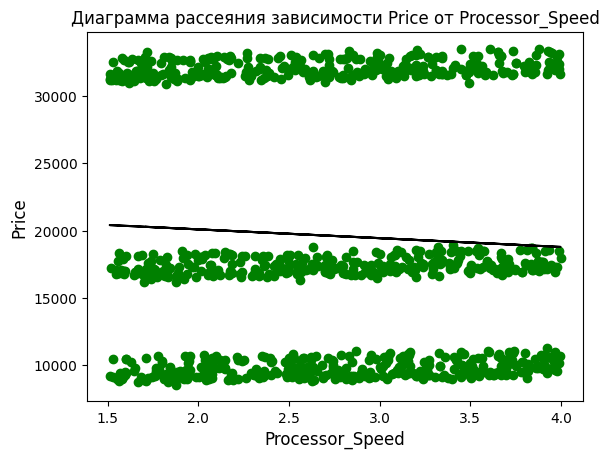

In [40]:
X2 = data['Processor_Speed'].values[:,np.newaxis]
y2 = data['Price'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('Processor_Speed', size=12)
plt.title('Диаграмма рассеяния зависимости Price от Processor_Speed')
plt.show()

Полиномиальная регрессия

In [41]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)


RMSE:  214.4395
  R2: 0.9995
 Adjusted R2: 0.9889
 Cross Validated R2: 0.9994


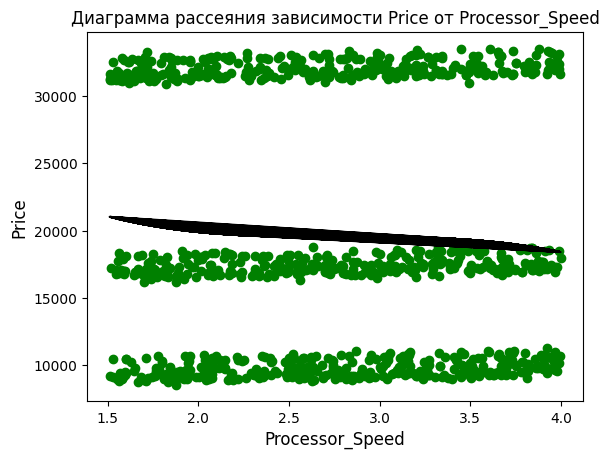

In [42]:
X2 = data['Processor_Speed'].values[:,np.newaxis]
y2 = data['Price'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('Processor_Speed', size=12)
plt.title('Диаграмма рассеяния зависимости Price от Processor_Speed')
plt.show()

Регрессия дерева принятия решений

In [43]:
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  278.9951
  R2: 0.9991
 Adjusted R2: 0.9991
 Cross Validated R2: 0.999


Регрессия случайного леса

In [44]:
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  217.0992
  R2: 0.9995
 Adjusted R2: 0.9994
 Cross Validated R2: 0.9994


Регрессия опорных векторов (SVR)



In [45]:
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  7719.4733
  R2: 0.3207
 Adjusted R2: 0.2847
 Cross Validated R2: 0.2813


In [46]:
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  9460.8865
  R2: -0.0204
 Adjusted R2: -0.0744
 Cross Validated R2: -0.0319


Регрессия ElasticNet

In [47]:
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  199.8934
  R2: 0.9995
 Adjusted R2: 0.9995
 Cross Validated R2: 0.9996


Согласно метрикам, науличшими оказались модели, построенная с помощью линейной регрессии и ElasticNet.

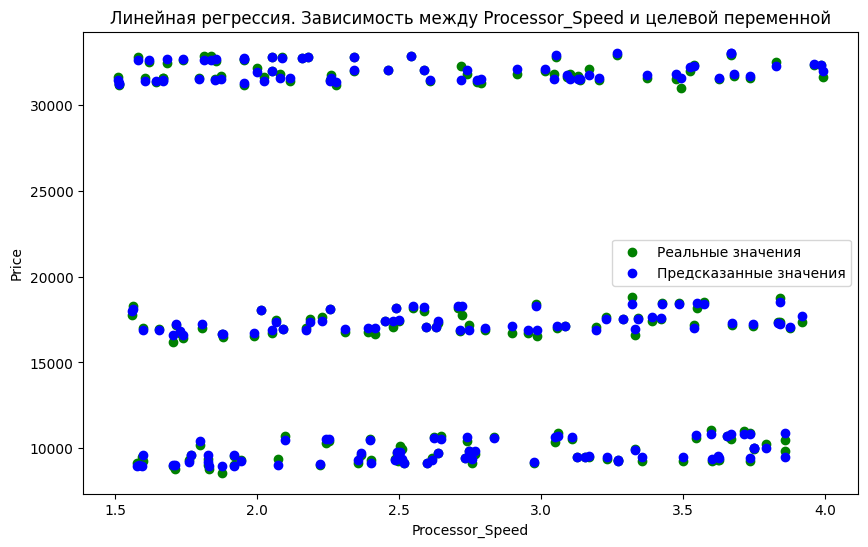

In [48]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test['Processor_Speed'], y_test, color='g', label='Реальные значения')
plt.scatter(X_test['Processor_Speed'], y_pr_LR, color='b', label='Предсказанные значения')
plt.xlabel('Processor_Speed')
plt.ylabel('Price')
plt.title('Линейная регрессия. Зависимость между Processor_Speed и целевой переменной')
plt.legend()
plt.show()

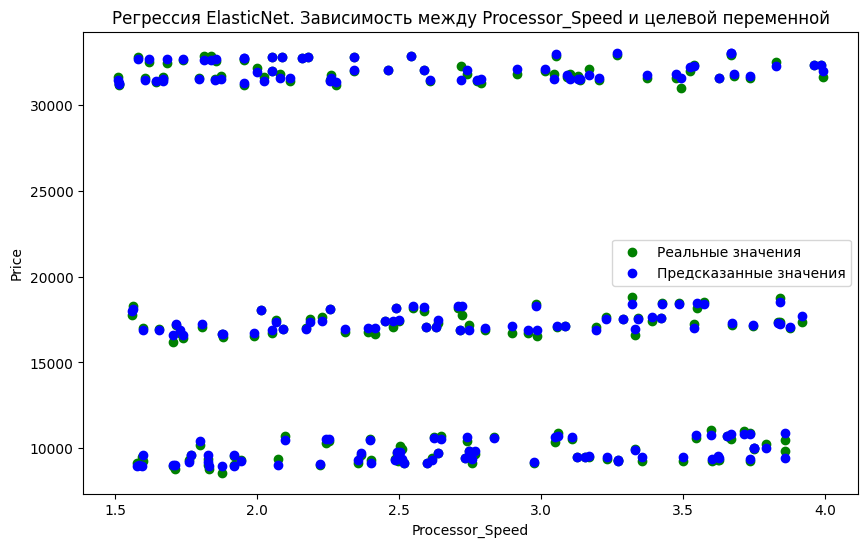

In [49]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test['Processor_Speed'], y_test, color='g', label='Реальные значения')
plt.scatter(X_test['Processor_Speed'], y_en_pred, color='b', label='Предсказанные значения')
plt.xlabel('Processor_Speed')
plt.ylabel('Price')
plt.title('Регрессия ElasticNet. Зависимость между Processor_Speed и целевой переменной')
plt.legend()
plt.show()